### Elastic Net:
The diabetes dataset can be loaded using diabetes_data = load_diabetes(). It originally used in Efron, et.al. (2004). It contains  
442 records and 10 features:

Age: Age in years
Sex: Sex (binary)
BMI: Body mass index
BP: Average blood pressure
S1: Total serum cholesterol
S2: Low-density lipoproteins
S3: High-density lipoproteins
S4: Total cholesterol / HDL cholesterol ratio
S5: Log of serum triglycerides level
S6: Blood sugar level

All the feature values are mean-centered and scaled by the standard deviation times the number of samples. The target variable is a quantitative measure of disease progression one year after baseline (continuous). The command print(diabetes_data.DESCR) provides additional information.



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes_sklearn = load_diabetes()

# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data=diabetes_sklearn.data,
                           columns=diabetes_sklearn.feature_names)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes_sklearn.target

X = diabetes_df.drop(columns='target')
y = diabetes_df['target']

In [12]:
summary_stats=diabetes_df.describe()
summary_stats.T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


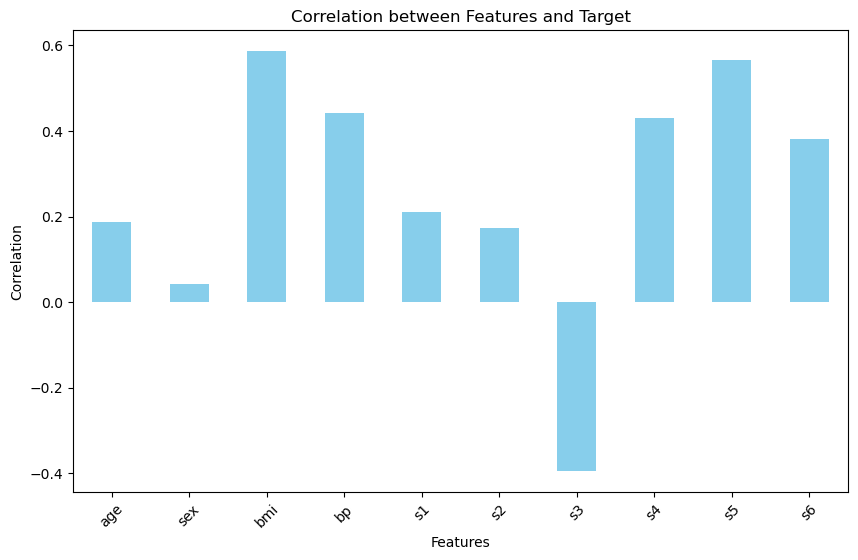

In [15]:
correlation = X.corrwith(y)

# Plot the correlation as a bar chart
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation between Features and Target')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [24]:
import numpy as np
import warnings
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
elastic_net=ElasticNet(random_state=42, max_iter=1000, tol=1e-8,selection='random')
param_grid={
    "alpha":np.logspace(-5,2,20),
    "l1_ratio":np.linspace(0,1,20)
}
grid_search=\
    GridSearchCV(
        estimator=elastic_net,
        param_grid=param_grid,
        cv=3,
        scoring="neg_mean_squared_error")

warnings.filterwarnings("ignore",category=ConvergenceWarning)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=ElasticNet(random_state=42, selection='random',
                                  tol=1e-08),
             param_grid={'alpha': array([1.00000000e-05, 2.33572147e-05, 5.45559478e-05, 1.27427499e-04,
       2.97635144e-04, 6.95192796e-04, 1.62377674e-03, 3.79269019e-03,
       8.85866790e-03, 2.06913808e-02, 4.83293024e-02, 1.12883789e-01,
       2.63665090e-01, 6.15848211e-01, 1.43844989e+00, 3.35981829e+00,
       7.84759970e+00, 1.83298071e+01, 4.28133240e+01, 1.00000000e+02]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='neg_mean_squared_error')

In [26]:
results_df=pd.DataFrame(grid_search.cv_results_)
columns_to_display=["param_alpha","param_l1_ratio","mean_test_score","rank_test_score"]
results_df=results_df[columns_to_display]
results_df=results_df.sort_values(by="rank_test_score")
results_df

,param_alpha,param_l1_ratio,mean_test_score,rank_test_score
220,0.112884,0.0,-3202.837900,1
221,0.112884,0.052632,-3202.961368,2
251,0.263665,0.578947,-3203.033402,3
222,0.112884,0.105263,-3203.159832,4
250,0.263665,0.526316,-3203.221688,5
...,...,...,...,...
395,100.0,0.789474,-6262.526110,391
396,100.0,0.842105,-6262.526110,391
397,100.0,0.894737,-6262.526110,391
398,100.0,0.947368,-6262.526110,391


In [36]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
ElasticNet(alpha=0.11288378916846883, l1_ratio=0.0, random_state=42,
           selection='random', tol=1e-08)

Best Parameters:
alpha: 0.11288378916846883
l1_ratio: 0.0


In [34]:
y_pred=best_model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error on Test Data:",rmse)

Root Mean Squared Error on Test Data: 52.9811174598002


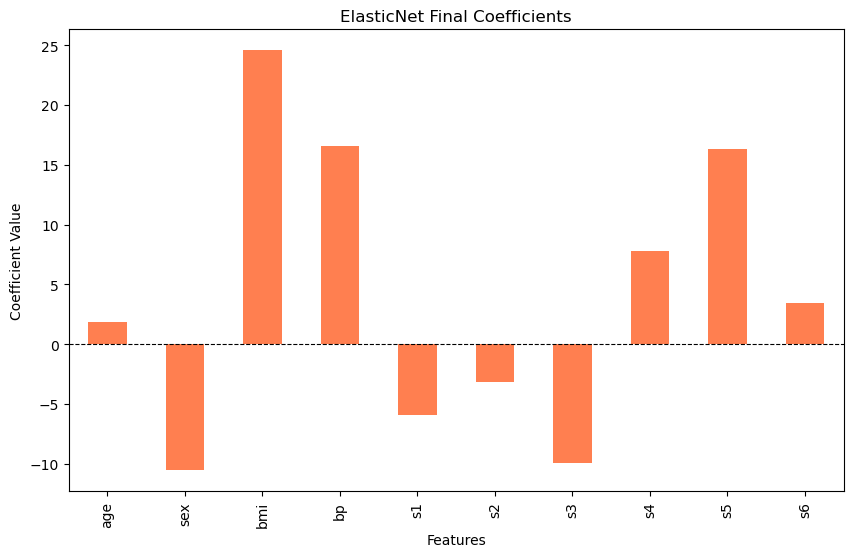

In [32]:
coefficients = pd.Series(best_model.coef_, index=diabetes_sklearn.feature_names)
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar', color='coral')
plt.title("ElasticNet Final Coefficients")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.show()

### Elastic Net:
The prostate cancer dataset from the Elements of Statistical Learning can be downloaded from the following website:

https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data

Here is a brief description of the data:

lcavol: Logarithm of prostate cancer volume (continuous).\
lweight: Logarithm of prostate weight (continuous).\
age: Age of the patient (continuous).\
lbph: Logarithm of the amount of benign prostatic hyperplasia (continuous).\
svi: Seminal vesicle invasion (binary; 1 if present, 0 if not).\
lcp: Logarithm of capsular penetration (continuous).\
gleason: Gleason score (ordinal; a grading system for prostate cancer).\
pgg45: Percentage Gleason scores 4 or 5 (continuous).\
lpsa: Logarithm of prostate-specific antigen (continuous; the target variable for prediction).\
Additional information on the data can be found here:

https://hastie.su.domains/ElemStatLearn/datasets/prostate.info.txt

In [106]:
import pandas as pd

# URL for the Prostate Cancer Dataset
url = "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data"

# Load the dataset into a pandas DataFrame
prostate_df = pd.read_csv(url, sep='\t')  # The file is tab-delimited
prostate_df.drop(['Unnamed: 0', 'train'], axis=1, inplace=True)
# Show the first few rows of the DataFrame
print(prostate_df.head())
# Dataset overview
print(prostate_df.info())  # Data types and missing values
print(prostate_df.describe())  # Descriptive statistics for numerical columns


     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
dtypes: floa

In [108]:
# Features (X) and Target (y)
X = prostate_df.drop('lpsa', axis=1)  # Drop the target column 'lpsa'
y = prostate_df['lpsa']  # Target variable

# Check the shape of the features and target
print(X.shape, y.shape)


(97, 8) (97,)


In [110]:
summary_stats=prostate_df.describe()
summary_stats.T

,count,mean,std,min,25%,50%,75%,max
lcavol,97.0,1.350010,1.178625,-1.347074,0.512824,1.446919,2.127041,3.821004
lweight,97.0,3.628943,0.428411,2.374906,3.375880,3.623007,3.876396,4.780383
age,97.0,63.865979,7.445117,41.000000,60.000000,65.000000,68.000000,79.000000
lbph,97.0,0.100356,1.450807,-1.386294,-1.386294,0.300105,1.558145,2.326302
svi,97.0,0.216495,0.413995,0.000000,0.000000,0.000000,0.000000,1.000000
lcp,97.0,-0.179366,1.398250,-1.386294,-1.386294,-0.798508,1.178655,2.904165
gleason,97.0,6.752577,0.722134,6.000000,6.000000,7.000000,7.000000,9.000000
pgg45,97.0,24.381443,28.204035,0.000000,0.000000,15.000000,40.000000,100.000000
lpsa,97.0,2.478387,1.154329,-0.430783,1.731656,2.591516,3.056357,5.582932


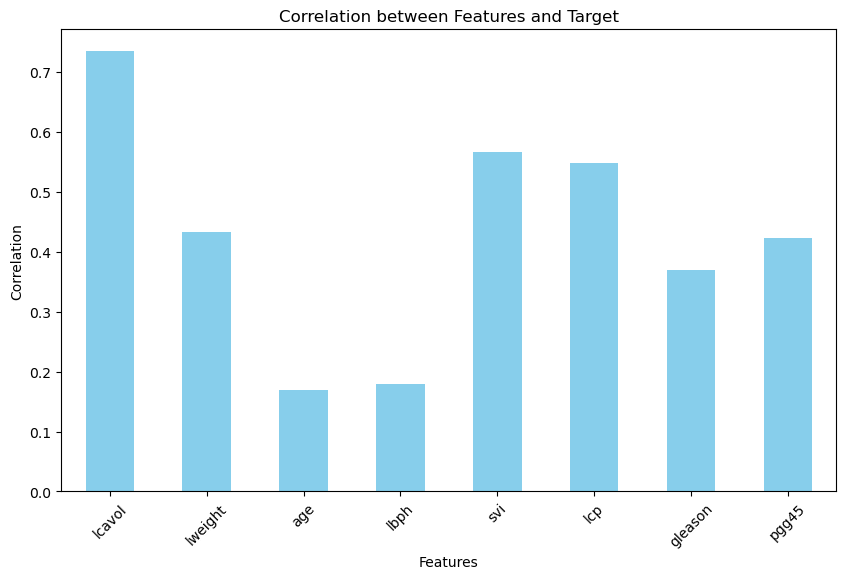

In [112]:
# Keep only numeric columns
correlation = X.corrwith(y)

# Plot the correlation as a bar chart
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation between Features and Target')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [116]:
import numpy as np
import warnings
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
elastic_net=ElasticNet(random_state=42, max_iter=1000, tol=1e-8,selection='random')
param_grid={
    "alpha":np.logspace(-5,2,20),
    "l1_ratio":np.linspace(0,1,10)
}
grid_search=\
    GridSearchCV(
        estimator=elastic_net,
        param_grid=param_grid,
        cv=3,
        scoring="neg_mean_squared_error")
warnings.filterwarnings("ignore",category=ConvergenceWarning)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=ElasticNet(random_state=42, selection='random',
                                  tol=1e-08),
             param_grid={'alpha': array([1.00000000e-05, 2.33572147e-05, 5.45559478e-05, 1.27427499e-04,
       2.97635144e-04, 6.95192796e-04, 1.62377674e-03, 3.79269019e-03,
       8.85866790e-03, 2.06913808e-02, 4.83293024e-02, 1.12883789e-01,
       2.63665090e-01, 6.15848211e-01, 1.43844989e+00, 3.35981829e+00,
       7.84759970e+00, 1.83298071e+01, 4.28133240e+01, 1.00000000e+02]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='neg_mean_squared_error')

In [118]:
results_df=pd.DataFrame(grid_search.cv_results_)
columns_to_display=["param_alpha","param_l1_ratio","mean_test_score","rank_test_score"]
results_df=results_df[columns_to_display]
results_df=results_df.sort_values(by="rank_test_score")
results_df

,param_alpha,param_l1_ratio,mean_test_score,rank_test_score
119,0.112884,1.0,-0.594449,1
118,0.112884,0.888889,-0.599994,2
117,0.112884,0.777778,-0.611272,3
116,0.112884,0.666667,-0.624023,4
115,0.112884,0.555556,-0.638041,5
...,...,...,...,...
169,7.8476,1.0,-1.503766,154
171,18.329807,0.111111,-1.503766,154
172,18.329807,0.222222,-1.503766,154
159,3.359818,1.0,-1.503766,154


In [120]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
ElasticNet(alpha=0.11288378916846883, l1_ratio=1.0, random_state=42,
           selection='random', tol=1e-08)

Best Parameters:
alpha: 0.11288378916846883
l1_ratio: 1.0


In [122]:
y_pred=best_model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.6803579875722222


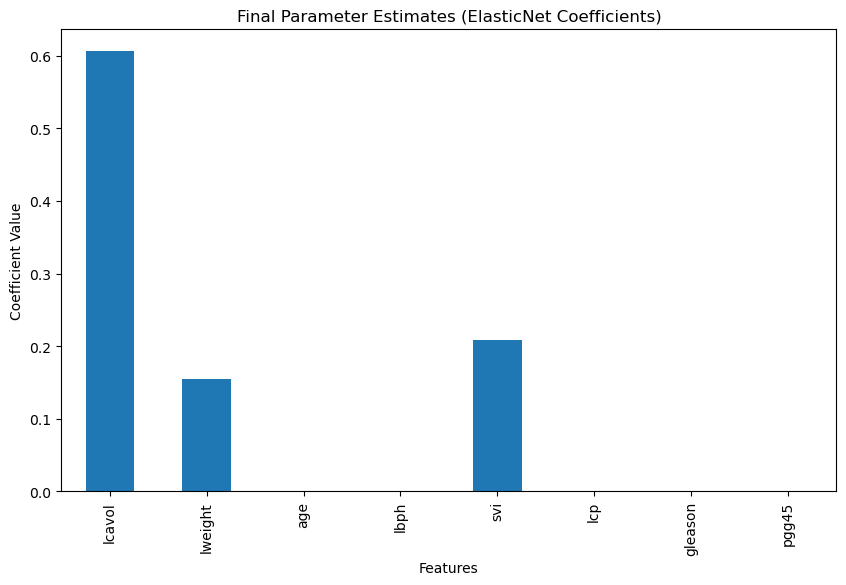

In [124]:
coef = pd.Series(best_model.coef_, index=X.columns)

# Plot the coefficients as a bar chart
coef.plot(kind="bar", figsize=(10, 6))
plt.title("Final Parameter Estimates (ElasticNet Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

### Logistic Regression:
The spambase dataset is can be used to train models for spam email detection. The data and detail information can be found on the UCI Machine Learning Repository. Here's a link to the dataset: Spambase Dataset.


In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"

# Load the dataset (features and target)
columns = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
    "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
    "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
    "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
    "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
    "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
    "capital_run_length_longest", "capital_run_length_total", "is_spam"
]
data = pd.read_csv(url, header=None, names=columns)

In [60]:
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column is the target

In [62]:
summary_stats = X.copy()
summary_stats['target'] = y
summary = summary_stats.describe(percentiles=[0.25, 0.5, 0.75]).T
print("Summary Statistics:\n", summary)

Summary Statistics:
                              count        mean         std  min     25%  \
word_freq_make              4601.0    0.104553    0.305358  0.0   0.000   
word_freq_address           4601.0    0.213015    1.290575  0.0   0.000   
word_freq_all               4601.0    0.280656    0.504143  0.0   0.000   
word_freq_3d                4601.0    0.065425    1.395151  0.0   0.000   
word_freq_our               4601.0    0.312223    0.672513  0.0   0.000   
word_freq_over              4601.0    0.095901    0.273824  0.0   0.000   
word_freq_remove            4601.0    0.114208    0.391441  0.0   0.000   
word_freq_internet          4601.0    0.105295    0.401071  0.0   0.000   
word_freq_order             4601.0    0.090067    0.278616  0.0   0.000   
word_freq_mail              4601.0    0.239413    0.644755  0.0   0.000   
word_freq_receive           4601.0    0.059824    0.201545  0.0   0.000   
word_freq_will              4601.0    0.541702    0.861698  0.0   0.000   
word

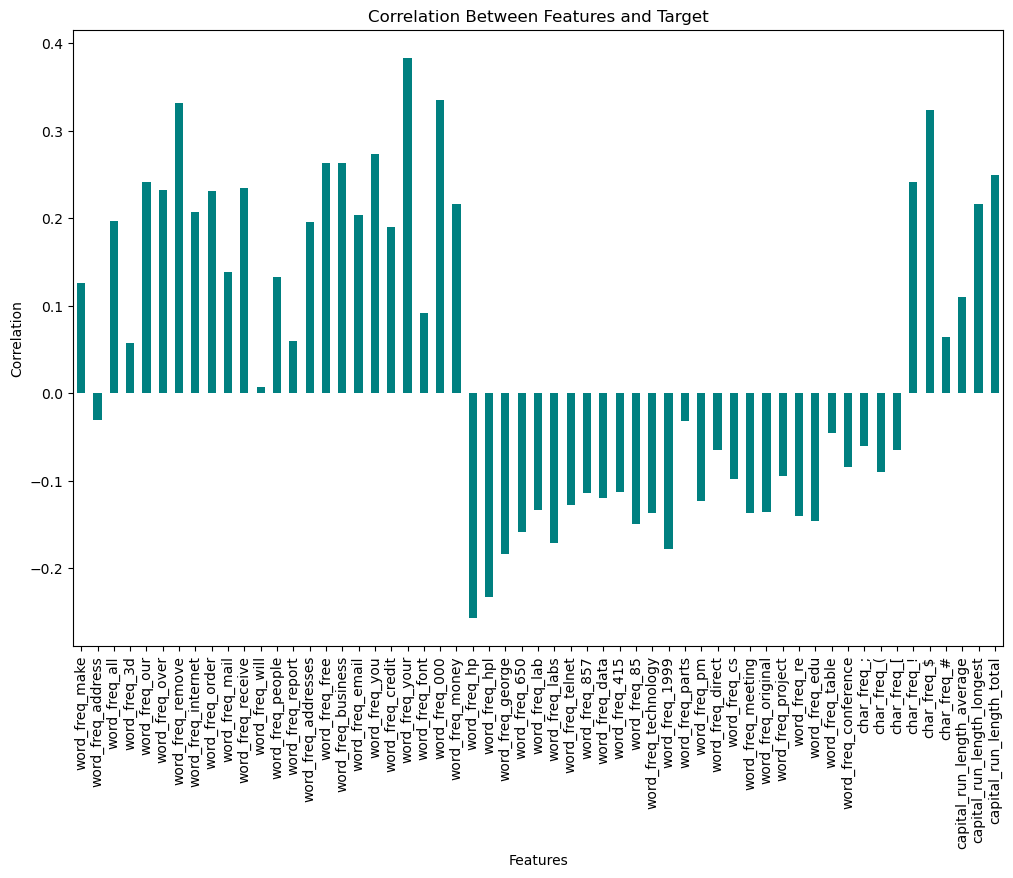

In [64]:
correlations = X.corrwith(y)
plt.figure(figsize=(12, 8))
correlations.plot(kind='bar', color='teal')
plt.title("Correlation Between Features and Target")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing datasets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Initiate Logistic Regression with elasticnet penalty
log_reg = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

# Define hyperparameter grid
param_grid = { 'C': [0.01, 0.1, 1, 10, 100],
               'l1_ratio': [0, 0.25, 0.5, 0.75, 1 ]}

# Set up GridSearchCV with accuracy as the scoring metric
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
             scoring='accuracy', verbose=1)

In [70]:
results_df=pd.DataFrame(grid_search.cv_results_)
columns_to_display=["param_C","param_l1_ratio","mean_test_score","rank_test_score"]
results_df=results_df[columns_to_display]
results_df=results_df.sort_values(by="rank_test_score")
results_df

,param_C,param_l1_ratio,mean_test_score,rank_test_score
22,100,0.5,0.921121,1
24,100,1,0.920810,2
21,100,0.25,0.920810,2
20,100,0,0.920810,2
17,10,0.5,0.920810,2
16,10,0.25,0.920810,2
23,100,0.75,0.920810,2
15,10,0,0.920500,8
19,10,1,0.920499,9
18,10,0.75,0.920499,9


In [72]:
best_model = grid_search.best_estimator_
print("Best Model Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Model Parameters: {'C': 100, 'l1_ratio': 0.5}
Best Cross-Validation Accuracy: 0.9211206968864453


In [75]:
from IPython.display import Markdown, display

def display_results_as_markdown():
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    markdown_text = f"""
    ### Final Results
    
    **Model Selected:**
    - Logistic Regression with ElasticNet Penalty
    
    **Best Model Parameters:**
    - C: {best_params['C']}
    - l1_ratio: {best_params['l1_ratio']}
    
    **Best Cross-Validation Accuracy:**
    - {best_score:.4f}
    """
    
    display(Markdown(markdown_text))

display_results_as_markdown()



    ### Final Results
    
    **Model Selected:**
    - Logistic Regression with ElasticNet Penalty
    
    **Best Model Parameters:**
    - C: 100
    - l1_ratio: 0.5
    
    **Best Cross-Validation Accuracy:**
    - 0.9211
    

In [77]:
from sklearn.metrics import accuracy_score

y_test_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

sqrt_accuracy = np.sqrt(test_accuracy)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


print(f"Test Accuracy: {test_accuracy:.4f}")
print("Root Mean Squared Error (RMSE) on Test Data:", rmse)
print(f"Square Root of Test Accuracy: {sqrt_accuracy:.4f}")

Test Accuracy: 0.9261
Root Mean Squared Error (RMSE) on Test Data: 0.27177108397591776
Square Root of Test Accuracy: 0.9624


Top 10 Positive Coefficients:
word_freq_3d                  1.735684
char_freq_$                   1.194087
char_freq_#                   1.121452
word_freq_free                0.927323
word_freq_000                 0.887479
capital_run_length_longest    0.884000
word_freq_remove              0.857588
word_freq_credit              0.711239
capital_run_length_total      0.695883
word_freq_technology          0.482690
dtype: float64

Top 10 Negative Coefficients:
word_freq_george       -8.530445
word_freq_hp           -3.279527
word_freq_cs           -3.077811
word_freq_project      -1.580745
word_freq_meeting      -1.333149
word_freq_lab          -1.279507
word_freq_edu          -1.209838
word_freq_conference   -1.125644
word_freq_85           -0.823402
word_freq_hpl          -0.774620
dtype: float64


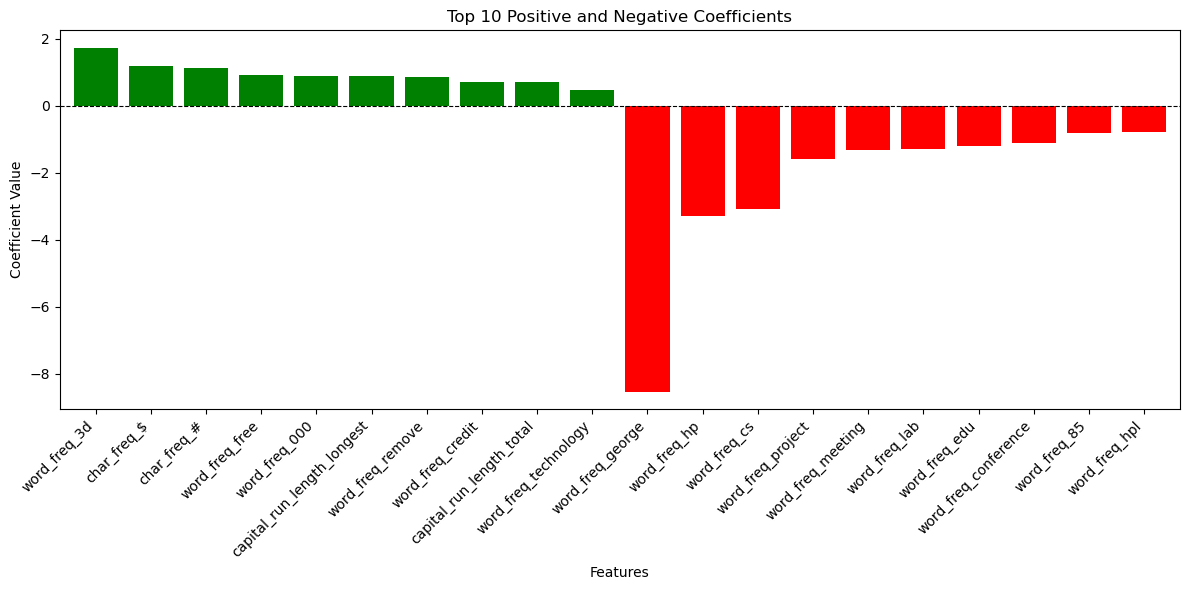

In [79]:
import matplotlib.pyplot as plt

coefficients = pd.Series(best_model.coef_.flatten(), index=X.columns)

# Get the top 10 positive and top 10 negative coefficients
top_10_positive = coefficients.nlargest(10)
top_10_negative = coefficients.nsmallest(10)

print("Top 10 Positive Coefficients:")
print(top_10_positive)

print("\nTop 10 Negative Coefficients:")
print(top_10_negative)

top_10_combined = pd.concat([top_10_positive, top_10_negative])

plt.figure(figsize=(12, 6))
top_10_combined.plot(kind='bar', color=['green' if x > 0 else 'red' for x in top_10_combined], width=0.8)
plt.title("Top 10 Positive and Negative Coefficients")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()



### Logistic Regression:
The breast cancer dataset can be loaded using breast_cancer = load_breast_cancer().

In [84]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
breast_cancer = load_breast_cancer()

# Print dataset description
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [86]:
# Create DataFrame for features and target
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Series(breast_cancer.target, name="target")

# Display first few rows of the dataset
print("\nFeatures (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter 

In [88]:
# Summary statistics for features and target
print("\nSummary Statistics for Features:")
print(X.describe())

print("\nSummary Statistics for Target:")
print(y.describe())


Summary Statistics for Features:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000

In [90]:
# Compute average values grouped by target
grouped_averages = X.join(y).groupby("target").mean()

print("\nAverage Feature Values Grouped by Target:")
print(grouped_averages)


Average Feature Values Grouped by Target:
        mean radius  mean texture  mean perimeter   mean area  \
target                                                          
0         17.462830     21.604906      115.365377  978.376415   
1         12.146524     17.914762       78.075406  462.790196   

        mean smoothness  mean compactness  mean concavity  \
target                                                      
0              0.102898          0.145188        0.160775   
1              0.092478          0.080085        0.046058   

        mean concave points  mean symmetry  mean fractal dimension  ...  \
target                                                              ...   
0                  0.087990       0.192909                0.062680  ...   
1                  0.025717       0.174186                0.062867  ...   

        worst radius  worst texture  worst perimeter   worst area  \
target                                                              
0          2

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split data into training, validation, and testing datasets (60-20-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Display dataset shapes
print("\nDataset Shapes:")
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)



Dataset Shapes:
Training set: (455, 30) (455,)
Testing set: (114, 30) (114,)


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the LogisticRegression model
logistic_model = LogisticRegression(solver="saga", penalty='elasticnet', max_iter=10000)

# Define the hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "l1_ratio": [0, 0.25, 0.5, 0.75, 1]  # ElasticNet mixing parameter
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=3
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ................C=0.01, l1_ratio=0;, score=0.954 total time=   0.0s
[CV 2/3] END ................C=0.01, l1_ratio=0;, score=0.954 total time=   0.0s
[CV 3/3] END ................C=0.01, l1_ratio=0;, score=0.927 total time=   0.0s
[CV 1/3] END .............C=0.01, l1_ratio=0.25;, score=0.908 total time=   0.0s
[CV 2/3] END .............C=0.01, l1_ratio=0.25;, score=0.941 total time=   0.0s
[CV 3/3] END .............C=0.01, l1_ratio=0.25;, score=0.894 total time=   0.0s
[CV 1/3] END ..............C=0.01, l1_ratio=0.5;, score=0.855 total time=   0.0s
[CV 2/3] END ..............C=0.01, l1_ratio=0.5;, score=0.921 total time=   0.0s
[CV 3/3] END ..............C=0.01, l1_ratio=0.5;, score=0.834 total time=   0.0s
[CV 1/3] END .............C=0.01, l1_ratio=0.75;, score=0.809 total time=   0.0s
[CV 2/3] END .............C=0.01, l1_ratio=0.75;, score=0.796 total time=   0.0s
[CV 3/3] END .............C=0.01, l1_ratio=0.75;

In [96]:
# Display cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
print("\nCross-Validation Results (Top 5 Rows):")
print(cv_results.sort_values(by="rank_test_score").head())


Cross-Validation Results (Top 5 Rows):
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
5        0.014778      0.000974         0.001629        0.000410     0.1   
12       0.148670      0.017883         0.001140        0.000150       1   
14       0.350287      0.071019         0.001282        0.000470       1   
13       0.216478      0.010467         0.001220        0.000286       1   
10       0.062607      0.006128         0.001463        0.000508       1   

   param_l1_ratio                      params  split0_test_score  \
5               0   {'C': 0.1, 'l1_ratio': 0}           0.986842   
12            0.5   {'C': 1, 'l1_ratio': 0.5}           0.986842   
14              1     {'C': 1, 'l1_ratio': 1}           0.986842   
13           0.75  {'C': 1, 'l1_ratio': 0.75}           0.986842   
10              0     {'C': 1, 'l1_ratio': 0}           0.980263   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
5            0.98

In [100]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
LogisticRegression(C=0.1, l1_ratio=0, max_iter=10000, penalty='elasticnet',
                   solver='saga')

Best Parameters:
C: 0.1
l1_ratio: 0


In [102]:
y_pred = best_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Dataset: {test_accuracy:.4f}")



Accuracy on Test Dataset: 0.9825


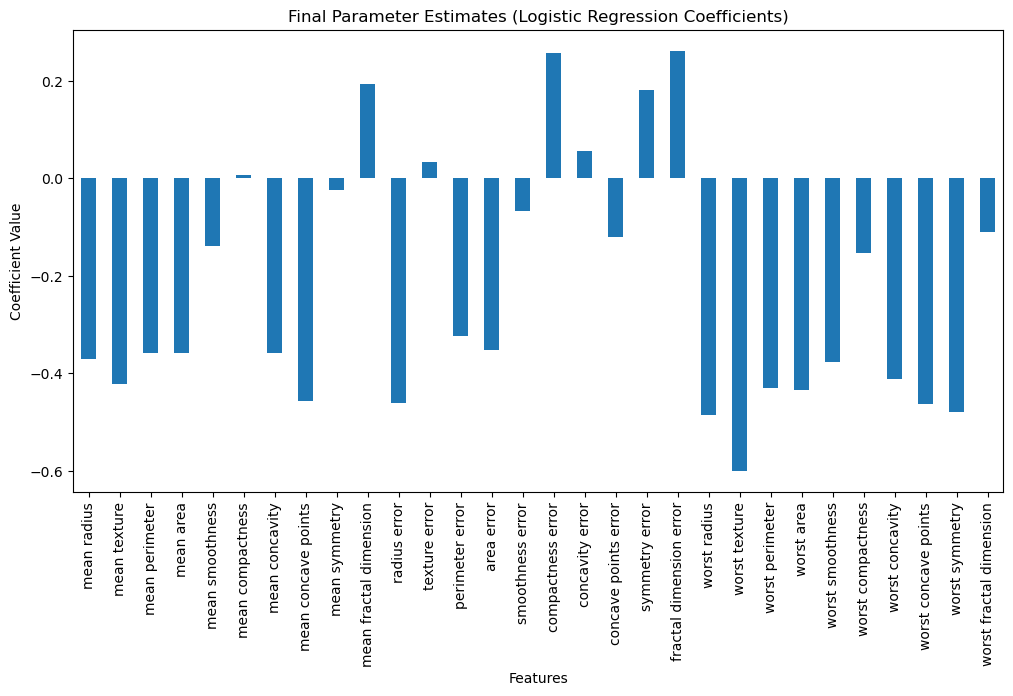

In [104]:
import matplotlib.pyplot as plt

# Get the coefficients of the best model
coef = pd.Series(best_model.coef_[0], index=breast_cancer.feature_names)

# Plot the coefficients as a bar chart
coef.plot(kind="bar", figsize=(12, 6))
plt.title("Final Parameter Estimates (Logistic Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()